In [4]:
# Pre Processing
import datetime
import math
import pandas as pd
import warnings
from collections import defaultdict,OrderedDict
import os, json, re, string
import numpy as np

#Change this function for the file paths if its different.
def load_default_parameters():
    train_file = "data/facebook/processed/fb_train.json"
    dev_file = "data/facebook/processed/fb_dev.json"
    test_file = "data/facebook/processed/fb_test.json"
    output_file = "facebook_kmeans"
    folder_name = "data/facebook/processed/fb/kmeans_predict"
    return train_file,dev_file,test_file,output_file,folder_name

def get_feature_vectors_only(fdict, data):
    #output = {}
    output = defaultdict(list)
    for item in data:
        vect = vectorize(fdict, item["labels"])
        total_labels = float(sum(vect))
        vect[:] = [x /total_labels for x in vect]
        item["message_id"] = item["message_id"]
        output[item["message_id"]] = vect
    return output

def compile_tweet_dict(json_list):
    result = {int(x["message_id"]): x["message"] for x in json_list}
    return result

def create_folder(foldername):
    if not os.path.exists(foldername):
        os.makedirs(foldername)

def read_json(fname):
    datastore = defaultdict(list)
    if fname:
        with open(fname, 'r') as f:
            datastore = json.load(f)
    return datastore

def get_data_dict (l):
    enuml = enumerate(l)
    fdict = defaultdict(list)
    rdict = defaultdict(list)
    fdict = {k:v for v, k in enuml}
    rdict = {k:v for v, k in fdict.items()}
    return (fdict, rdict)

def vectorize(fdict, labels):
    vect = defaultdict(list)
    vect = [0] * len(fdict)
    for name,number in labels.items():
        vect[fdict[name]] = number
    return vect
    
def write_model_logs_to_json(MODEL_LOG_DIR, results_dict, output_name):
    with open(MODEL_LOG_DIR +"/"+ output_name + ".json", "w") as fp:
        json.dump(results_dict, fp, sort_keys=True, indent=4)
    print ("Saved to "+MODEL_LOG_DIR +"/"+ output_name + ".json")

def read_labeled_data_KMeans(filename):
    answer_counters = defaultdict(list)
    JSONfile = read_json(filename)
    message_dict = compile_tweet_dict(JSONfile["data"])
    (fdict, label_dict) = get_data_dict(JSONfile["dictionary"])
    answer_counters = get_feature_vectors_only(fdict, JSONfile["data"])
    return answer_counters,message_dict,label_dict

def preprocess_data(input_train_file_name,input_dev_file_name,input_test_file_name,folder_name):

    create_folder(folder_name)
    create_folder(folder_name + "/logs")
    create_folder(folder_name + "/logs/models")

    train_answer_counters,train_message_dict,label_dict = read_labeled_data_KMeans(input_train_file_name)

    dev_answer_counters,dev_message_dict,label_dict = read_labeled_data_KMeans(input_dev_file_name)

    test_answer_counters,test_message_dict,label_dict = read_labeled_data_KMeans(input_test_file_name)

    return train_answer_counters,dev_answer_counters,label_dict,train_message_dict,dev_message_dict,test_answer_counters,test_message_dict

In [5]:
train_file,dev_file,test_file,output_file,folder_name = load_default_parameters()
#Reading Data
train_answer_counters,dev_answer_counters,label_dict,train_message_dict,dev_message_dict,test_answer_counters,test_message_dict = preprocess_data(train_file,dev_file,test_file,folder_name)


In [6]:
def classify(readed_json,assignment,cluster_num):
    list=[]
    for i in range(cluster_num):
        currentList=[]
        for item in range(len(assignment)):
            if assignment[item] == i:
                currentList.append(readed_json["data"][item])
        list.append(currentList)
    return list



In [7]:
def read_message(filename):
    JSONfile = read_json(filename)
    #     message = []
    #     for i in JSONfile["data"][0]["message"]:
    #         message.append([i])
    message = JSONfile["data"]
    res = []
    for i in message:
        res.append(i["message"])
    #     print(message)
    #     print(JSONfile)

    return res

print("work")

work


# question 2 below

In [8]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


embedder = SentenceTransformer('bert-base-nli-mean-tokens')
json_list = read_json(train_file)

corpus_embeddings = embedder.encode(read_message(train_file))
test_read = embedder.encode(read_message(test_file))

num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_
print(cluster_assignment)

print(len(corpus_embeddings) == len(cluster_assignment))


#below :  print q2 answer

[1 3 2 0 1 0 1 4 1 0 3 4 2 0 3 1 3 0 4 2 1 0 0 2 4 0 0 2 0 3 3 4 0 0 2 0 0
 1 2 4 0 3 0 0 4 1 3 4 2 0 3 2 4 2 1 0 4 3 0 0 3 4 1 2 4 3 0 1 4 0 4 0 2 1
 4 1 1 0 4 0 4 3 3 1 1 0 2 0 2 1 2 0 2 0 4 4 1 4 3 1 4 0 1 1 1 1 0 2 0 1 0
 1 4 3 3 0 1 3 4 3 3 0 0 0 0 0 3 1 3 1 1 4 0 0 1 2 1 3 0 3 0 3 1 0 4 2 3 2
 0 4 1 0 3 0 1 1 4 2 4 1 1 0 2 2 0 4 4 0 0 4 1 2 0 0 1 0 1 4 4 0 1 0 3 1 0
 0 0 4 0 4 1 1 3 1 3 2 2 4 0 2 1 4 4 4 1 0 0 4 2 4 0 4 0 0 4 3 2 3 4 4 0 4
 1 3 4 4 0 3 0 1 4 0 1 0 2 4 4 0 1 4 3 1 2 3 3 3 4 4 4 2 4 0 1 0 0 4 3 4 3
 2 1 2 1 1 0 0 0 1 1 0 3 1 1 1 2 0 4 4 3 4 0 1 3 3 0 3 4 4 4 2 2 4 1 1 1 1
 2 1 2 3 1 0 0 3 4 0 4 1 1 0 0 3 3 1 4 0 4 2 3 0 3 0 1 0 0 2 4 0 4 3 4 0 1
 2 2 0 2 2 1 0 0 4 1 4 0 4 0 2 4 0 4 4 0 1 0 3 1 0 0 3 4 4 2 4 4 4 1 1 4 0
 1 2 1 0 4 0 2 0 2 1 2 1 0 3 0 0 3 2 4 2 4 0 3 3 4 3 3 3 4 4 0 0 0 3 0 0 0
 1 1 2 2 0 1 1 3 1 2 0 1 0 2 1 1 1 3 3 4 0 4 4 3 3 3 0 4 3 0 1 3 1 3 1 3 2
 4 3 0 3 0 4 1 1 1 3 4 4 4 0 0 2 3 1 2 4 0 1 0 1 2 0 3 1 1 0 1 2 0 3 2 4 0
 1 1 4 2 0 4 0 1 4 0 1 1 

# question 3 below

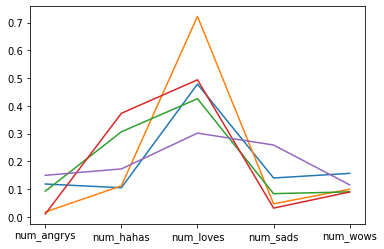

In [9]:
right_list = classify(json_list,cluster_assignment,num_clusters)
# print(right_list)
x = ["num_angrys", 
                "num_hahas", 
                "num_loves", 
                "num_sads", 
                "num_wows"]
y = []
for i in range(len(right_list)):
    bigLabel = []
    label1 = []
    label2 = []
    label3 = []
    label4 = []
    label5 = []
    temp = 0
    for j in right_list[i]:
        label1.append(j["labels"]["num_angrys"])
        label2.append(j["labels"]["num_hahas"])
        label3.append(j["labels"]["num_loves"])
        label4.append(j["labels"]["num_sads"])
        label5.append(j["labels"]["num_wows"])
    
        
    temp += sum(label1)
    temp += sum(label2)
    temp += sum(label3)
    temp += sum(label4)
    temp += sum(label5)
#     bigLabel.append(temp)
    
    sumall = temp
    bigLabel.append(sum(label1)/sumall)
    bigLabel.append(sum(label2)/sumall)
    bigLabel.append(sum(label3)/sumall)
    bigLabel.append(sum(label4)/sumall)
    bigLabel.append(sum(label5)/sumall)
    
    y.append(bigLabel)    
for i in range(5):
    
    plt.plot(x,y[i])
    
    
plt.show()

    
#below:  print is q3 answer, assign label distribution to the clustes.
#there are five labels probability distribution for each cluster.

# question 4 below

now loop: 4
True
[0.6422753121856053]
now loop: 5
True
[0.6422753121856053, 0.6423128644181368]
now loop: 6
True
[0.6422753121856053, 0.6423128644181368, 0.6296286862094064]
now loop: 7
True
[0.6422753121856053, 0.6423128644181368, 0.6296286862094064, 0.6482216382326803]
now loop: 8
True
[0.6422753121856053, 0.6423128644181368, 0.6296286862094064, 0.6482216382326803, 0.6388918184862453]
now loop: 9
True
[0.6422753121856053, 0.6423128644181368, 0.6296286862094064, 0.6482216382326803, 0.6388918184862453, 0.6162224138577729]
now loop: 10
True
[0.6422753121856053, 0.6423128644181368, 0.6296286862094064, 0.6482216382326803, 0.6388918184862453, 0.6162224138577729, 0.6398305312936958]
now loop: 11
True
[0.6422753121856053, 0.6423128644181368, 0.6296286862094064, 0.6482216382326803, 0.6388918184862453, 0.6162224138577729, 0.6398305312936958, 0.6225149604321479]
now loop: 12
True
[0.6422753121856053, 0.6423128644181368, 0.6296286862094064, 0.6482216382326803, 0.6388918184862453, 0.6162224138577

now loop: 32
True
[0.6422753121856053, 0.6423128644181368, 0.6296286862094064, 0.6482216382326803, 0.6388918184862453, 0.6162224138577729, 0.6398305312936958, 0.6225149604321479, 0.6384135087428394, 0.6366435793051044, 0.6496401883037609, 0.6303311867574507, 0.6366050231006377, 0.6291462108576662, 0.6221851701663534, 0.6234708891141911, 0.6182920429411956, 0.6454190540058848, 0.632110753937726, 0.648320047980367, 0.6380454994063581, 0.6145029266380341, 0.6432132148365728, 0.6218711814531197, 0.6360871568844296, 0.6227369770388712, 0.63934270236564, 0.644649289356753, 0.6201208231660956]
now loop: 33
True
[0.6422753121856053, 0.6423128644181368, 0.6296286862094064, 0.6482216382326803, 0.6388918184862453, 0.6162224138577729, 0.6398305312936958, 0.6225149604321479, 0.6384135087428394, 0.6366435793051044, 0.6496401883037609, 0.6303311867574507, 0.6366050231006377, 0.6291462108576662, 0.6221851701663534, 0.6234708891141911, 0.6182920429411956, 0.6454190540058848, 0.632110753937726, 0.648320

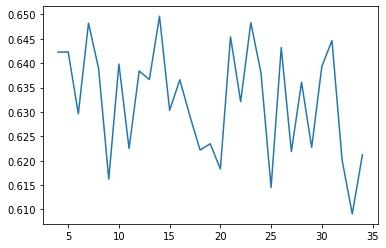

In [10]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.stats import entropy


res_q4 = []
embedder = SentenceTransformer('bert-base-nli-mean-tokens')
json_list = read_json(train_file)
#     test_json = read_json(test_file)

corpus_embeddings = embedder.encode(read_message(train_file))
for num_clusters in range(4,35):

#     test_bert = embedder.encode(read_message(test_file))
    
    clustering_model = KMeans(n_clusters=num_clusters)
    clustering_model.fit(corpus_embeddings)
#     test_assign = clustering_model.labels_
#     print(test_assign)
    cluster_assignment = clustering_model.labels_
# print(cluster_assignment)
    print('now loop:',num_clusters)
    print(len(corpus_embeddings) == len(cluster_assignment))


    right_list = classify(json_list,cluster_assignment,num_clusters)
    # print(right_list)
    res_each_cluster = []
    for i in range(len(right_list)):
        bigLabel = []
        
        p_list = []
        label1 = []
        label2 = []
        label3 = []
        label4 = []
        label5 = []
        temp = 0
        for j in right_list[i]:
            label1.append(j["labels"]["num_angrys"])
            label2.append(j["labels"]["num_hahas"])
            label3.append(j["labels"]["num_loves"])
            label4.append(j["labels"]["num_sads"])
            label5.append(j["labels"]["num_wows"])
            
        p_list.append(label1)
        p_list.append(label2)
        p_list.append(label3)
        p_list.append(label4)
        p_list.append(label5)
        
        p_list =[ [row[col] for row in p_list] for col in range(len(p_list[0]))]
#         print(len(p_list[0]))
        
        
#         map(list,*zip(p_list))
        
#         print(p_list)
        
        

        temp += sum(label1)
        temp += sum(label2)
        temp += sum(label3)
        temp += sum(label4)
        temp += sum(label5)

        sumall = temp
        bigLabel.append(sum(label1)/temp)
        bigLabel.append(sum(label2)/temp)
        bigLabel.append(sum(label3)/temp)
        bigLabel.append(sum(label4)/temp)
        bigLabel.append(sum(label5)/temp)
        sum_cluster_temp = 0
        for i in p_list:
            i_temp = []
            for j in range(5):
#                 t = s
                if sum(i) != 0:
                    p = i[j]/sum(i)
                else:
                    sum_cluster_temp += 0
                i_temp.append(p)
            sum_cluster_temp += entropy(i_temp,bigLabel)
#                 q = bigLabel[j]
            
                
                
#                 if q == 0 or p == 0:
#                     sum_cluster_temp += 0.0
#                     print("p or q is 0" + str(p) + str(q))
#                 else:
#                     sum_cluster_temp += stats.entropy(p,q)
                    
#             print('---',sum_cluster_temp)
        sum_cluster_temp = sum_cluster_temp/len(p_list)
        res_each_cluster.append(sum_cluster_temp)
    res_q4.append(sum(res_each_cluster)/num_clusters)
    print(res_q4)
    

x = range(4,35)
plt.plot(x,res_q4)
plt.show()
            
    
#below figure is answer for question4. 
#below lists are adding into result for the loss function value vs. number of clusters.

20 num of cluster is best because of the less loss.

# Question 5 below

now cluster number: 4
all length of vertor 4
now cluster number: 5
all length of vertor 5
now cluster number: 6
all length of vertor 6
now cluster number: 7
all length of vertor 7
now cluster number: 8
all length of vertor 8
now cluster number: 9
all length of vertor 9
now cluster number: 10
all length of vertor 10
now cluster number: 11
all length of vertor 11
now cluster number: 12
all length of vertor 12
now cluster number: 13
all length of vertor 13
now cluster number: 14
all length of vertor 14
now cluster number: 15
all length of vertor 15
now cluster number: 16
all length of vertor 16
now cluster number: 17
all length of vertor 17
now cluster number: 18
all length of vertor 18
now cluster number: 19
all length of vertor 19
now cluster number: 20
all length of vertor 20
now cluster number: 21
all length of vertor 21
now cluster number: 22
all length of vertor 22
now cluster number: 23
all length of vertor 23
now cluster number: 24
all length of vertor 24
now cluster number: 25
al

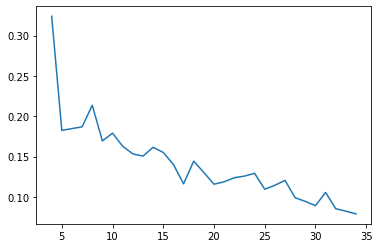

In [15]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.stats import entropy


json_list = read_json(train_file)
test_json = read_json(test_file)

def classfy_q5(vector,assign,num):
    alist = []
    for i in range(num):
        cur = []
        for item in range(len(assign)):
            
            if assign[item] == i:
                cur.append(vector[item])
        alist.append(cur)
    return alist
    

def q5():
    label_vertor = []
    for item in json_list["data"]:
        emo = item["labels"].values()
        label_vertor.append(list(emo))
#     print(label_vertor)
    
    test_vector = []
    for item in test_json["data"]:
        emo = item["labels"].values()
        test_vector.append(list(emo))
#     print(test_vector)
#     print(len(test_vector))
    
    res_ls = []

    for num_clusters in range(4,35):
#         num_clusters = 5
        clustering_model = KMeans(n_clusters=num_clusters)
        clustering_model.fit(label_vertor)
        cluster_assignment = clustering_model.labels_
        test_assign = clustering_model.predict(test_vector)
#         print(test_assign)
#         print(len(test_assign))
        
        right_vector = classfy_q5(test_vector,test_assign,num_clusters)
#         print(len(right_vector),len(right_vector[0]))
        sum_q = []
        print('now cluster number:', num_clusters)
        print('all length of vertor',len(right_vector))
        #第二层
        for clust_each in right_vector:
            #q
            sumall = 0
            q_each = []
            sum_entro = 0
            sum_each_c = 0
            
            
            p_list = list(zip(*clust_each))
#             print(len(p_list))
            for i in range(len(p_list)):
                sumall += sum(p_list[i])
                
            for i in range(len(p_list)):
                q_each.append(sum(p_list[i])/sumall)
#             print(q_each)
            for p in clust_each:
                i_temp = []
                for i in range(5):
                    if sum(p) != 0:
                        pxt = p[i]/sum(p)
                    else:
                        sum_entro += 0
                    i_temp.append(pxt)
                sum_entro += entropy(i_temp,q_each)
            if len(clust_each) == 0:
                sum_each_c += 0
            else:
                sum_each_c = sum_entro/len(clust_each)
            
            sum_q.append(sum_each_c)
        res_ls.append(sum(sum_q)/num_clusters)
        
    print('loss list is: ',res_ls)
    return res_ls
            
            #q_each is q for all list
            
#             print('clus',len(p_list))
    
res = q5()
xli = range(4,35)
plt.plot(xli,res)
plt.show()

Compared with question 4, using text feature has more less loss value, So I think using text feature is better.

# question 6 below

now loop: 4
True
[0.6280590593123901]
now loop: 5
True
[0.6280590593123901, 0.6522537939963209]
now loop: 6
True
[0.6280590593123901, 0.6522537939963209, 0.6446325844816881]
now loop: 7
True
[0.6280590593123901, 0.6522537939963209, 0.6446325844816881, 0.6304887957429894]
now loop: 8
True
[0.6280590593123901, 0.6522537939963209, 0.6446325844816881, 0.6304887957429894, 0.6202033376672959]
now loop: 9
True
[0.6280590593123901, 0.6522537939963209, 0.6446325844816881, 0.6304887957429894, 0.6202033376672959, 0.6308558874220378]
now loop: 10
True
[0.6280590593123901, 0.6522537939963209, 0.6446325844816881, 0.6304887957429894, 0.6202033376672959, 0.6308558874220378, 0.6526461493020579]
now loop: 11
True
[0.6280590593123901, 0.6522537939963209, 0.6446325844816881, 0.6304887957429894, 0.6202033376672959, 0.6308558874220378, 0.6526461493020579, 0.624172642337382]
now loop: 12
True
[0.6280590593123901, 0.6522537939963209, 0.6446325844816881, 0.6304887957429894, 0.6202033376672959, 0.63085588742203

now loop: 32
True
[0.6280590593123901, 0.6522537939963209, 0.6446325844816881, 0.6304887957429894, 0.6202033376672959, 0.6308558874220378, 0.6526461493020579, 0.624172642337382, 0.6412651062924094, 0.637003670676157, 0.6400458636979519, 0.5996412498913891, 0.6362824097778508, 0.6604887334534382, 0.6250225720022823, 0.5663745799249685, 0.6192794311247967, 0.6134151600087759, 0.6642424834860814, 0.6254549697529646, 0.5859612027515432, 0.5938197131267563, 0.6034023929342989, 0.627897944587909, 0.6275381232561416, 0.6009584067475222, 0.5962104992721977, 0.5803882495407431, 0.5809584027029218]
now loop: 33
True
[0.6280590593123901, 0.6522537939963209, 0.6446325844816881, 0.6304887957429894, 0.6202033376672959, 0.6308558874220378, 0.6526461493020579, 0.624172642337382, 0.6412651062924094, 0.637003670676157, 0.6400458636979519, 0.5996412498913891, 0.6362824097778508, 0.6604887334534382, 0.6250225720022823, 0.5663745799249685, 0.6192794311247967, 0.6134151600087759, 0.6642424834860814, 0.62545

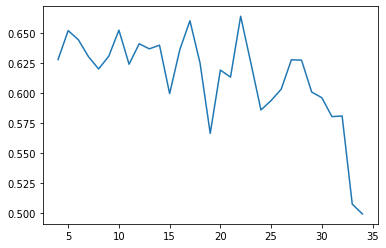

In [20]:
from sklearn.cluster import MiniBatchKMeans
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
from scipy.stats import entropy


res_q4 = []
embedder = SentenceTransformer('bert-base-nli-mean-tokens')
json_list = read_json(train_file)
#     test_json = read_json(test_file)

corpus_embeddings = embedder.encode(read_message(train_file))
for num_clusters in range(4,35):

#     test_bert = embedder.encode(read_message(test_file))
    
    clustering_model = MiniBatchKMeans(n_clusters=num_clusters)
    clustering_model.fit(corpus_embeddings)
#     test_assign = clustering_model.labels_
#     print(test_assign)
    cluster_assignment = clustering_model.labels_
# print(cluster_assignment)
    print('now loop:',num_clusters)
    print(len(corpus_embeddings) == len(cluster_assignment))


    right_list = classify(json_list,cluster_assignment,num_clusters)
    # print(right_list)
    res_each_cluster = []
    for i in range(len(right_list)):
        bigLabel = []
        
        p_list = []
        label1 = []
        label2 = []
        label3 = []
        label4 = []
        label5 = []
        temp = 0
        for j in right_list[i]:
            label1.append(j["labels"]["num_angrys"])
            label2.append(j["labels"]["num_hahas"])
            label3.append(j["labels"]["num_loves"])
            label4.append(j["labels"]["num_sads"])
            label5.append(j["labels"]["num_wows"])
            
        p_list.append(label1)
        p_list.append(label2)
        p_list.append(label3)
        p_list.append(label4)
        p_list.append(label5)
        
        p_list =[ [row[col] for row in p_list] for col in range(len(p_list[0]))]
#         print(len(p_list[0]))
        
        
#         map(list,*zip(p_list))
        
#         print(p_list)
        
        

        temp += sum(label1)
        temp += sum(label2)
        temp += sum(label3)
        temp += sum(label4)
        temp += sum(label5)

        sumall = temp
        bigLabel.append(sum(label1)/temp)
        bigLabel.append(sum(label2)/temp)
        bigLabel.append(sum(label3)/temp)
        bigLabel.append(sum(label4)/temp)
        bigLabel.append(sum(label5)/temp)
        sum_cluster_temp = 0
        for i in p_list:
            i_temp = []
            for j in range(5):
#                 t = s
                if sum(i) != 0:
                    p = i[j]/sum(i)
                else:
                    sum_cluster_temp += 0
                i_temp.append(p)
            sum_cluster_temp += entropy(i_temp,bigLabel)
#                 q = bigLabel[j]
            
                
                
#                 if q == 0 or p == 0:
#                     sum_cluster_temp += 0.0
#                     print("p or q is 0" + str(p) + str(q))
#                 else:
#                     sum_cluster_temp += stats.entropy(p,q)
                    
#             print('---',sum_cluster_temp)
        sum_cluster_temp = sum_cluster_temp/len(p_list)
        res_each_cluster.append(sum_cluster_temp)
    res_q4.append(sum(res_each_cluster)/num_clusters)
    print(res_q4)
    

x = range(4,35)
plt.plot(x,res_q4)
plt.show()
            
    
#below figure is answer for question4. 
#below lists are adding into result for the loss function value vs. number of clusters.

[[  17   44    2   12   48]
 [  38   94   27    4    3]
 [  87    2    2  108    2]
 [   4    1   56    8    8]
 [   4    6   52   92    1]
 [   2    5   58    0    1]
 [   0    2    4   81    2]
 [   1    0    0   66    5]
 [   8   35   29    3    8]
 [   0   33 1100    0   12]]
21


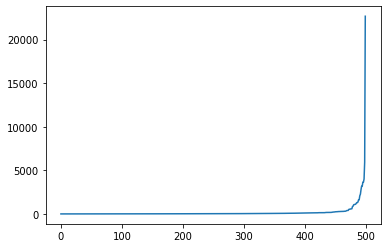

In [19]:
# from sklearn.cluster import DBSCAN

# q6_train = []
# for item in test_json["data"]:
#     emo = item["labels"].values()
#     q6_train.append(list(emo))

# model = DBSCAN().fit_predict(q6_train)
# print(model)


#reference 'dbscan sklearn.cluster.DBSCAN document';
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt

neigh = NearestNeighbors(n_neighbors=2)
X = np.array([[v for k,v in sorted(obj["labels"].items())] for obj in test_json["data"]])
print(X[:10])
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
m = DBSCAN(eps=1000, min_samples=1)
m.fit(X)

core_samples_mask = np.zeros_like(m.labels_, dtype=bool)
core_samples_mask[m.core_sample_indices_] = True
labels = m.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(n_clusters_)